# Extract outbreak data

## Import packages

In [8]:
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
import contextily as ctx

## Extract WSB outbreak polygons from ADS data

In [12]:
# File paths
all_damage_areas_path = r"C:\Users\imire\OneDrive - UW\Documents\GDA567\extracted_ADS_layers\damage_areas\a_DAMAGE_AREAS_all.geojson"
mnf_bounds_path = r"C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\mnf_bounds.geojson"

In [13]:
# Read and prepare layers
damage_areas = gpd.read_file(all_damage_areas_path).to_crs(epsg = 3857)
mnf_bounds = gpd.read_file(mnf_bounds_path).to_crs(damage_areas.crs)  # Match CRS

In [17]:
damage_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37052 entries, 0 to 37051
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   DAMAGE_AREA_ID           37052 non-null  object             
 1   CREATED_DATE             103 non-null    datetime64[ms, UTC]
 2   MODIFIED_DATE            103 non-null    datetime64[ms, UTC]
 3   FEATURE_USER_ID          103 non-null    object             
 4   OBSERVATION_USER_ID      103 non-null    object             
 5   REGION_ID                37052 non-null  int32              
 6   LABEL                    103 non-null    object             
 7   HOST_CODE                36949 non-null  float64            
 8   HOST                     382 non-null    object             
 9   HOST_GROUP_CODE          36290 non-null  float64            
 10  HOST_GROUP               36287 non-null  object             
 11  DCA_CODE            

"damage_areas" contains all data collected by the aerial detection survey for all of USFS Region 6 (Washington and Oregon) for all years collected (dating back to the 1940s) and all potential causes of damage (e.g., different pests, fire, other disturbances). We want to focus in on the western spruce budworm (DCA code "12040") outbreaks of the 1980s in Malheur National Forest. To ensure we aren't missing important data, we'll include the 15 years prior to the 1980s outbreaks as the effects of some outbreaks could affect later fire behavior even 20 years later. 

In [18]:
# Filter out damage causes other than WSB
damage_areas_filtered = damage_areas.loc[damage_areas["DCA_CODE"] == 12040]

# Filter out outbreaks prior to 1965 and after 1990
damage_areas_filtered = damage_areas_filtered[(damage_areas_filtered["SURVEY_YEAR"] >= 1965) & (damage_areas_filtered["SURVEY_YEAR"] <= 1990)] 

# Select only outbreak polygons that intersect MNF boundary
mnf_damage_areas = gpd.overlay(damage_areas_filtered, mnf_bounds, how = "intersection") 
mnf_damage_areas = mnf_damage_areas[damage_areas_filtered.columns] # Keep only original damage_areas columns

mnf_damage_areas.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 51 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   DAMAGE_AREA_ID           1070 non-null   object             
 1   CREATED_DATE             0 non-null      datetime64[ms, UTC]
 2   MODIFIED_DATE            0 non-null      datetime64[ms, UTC]
 3   FEATURE_USER_ID          0 non-null      object             
 4   OBSERVATION_USER_ID      0 non-null      object             
 5   REGION_ID                1070 non-null   int32              
 6   LABEL                    0 non-null      object             
 7   HOST_CODE                1070 non-null   float64            
 8   HOST                     0 non-null      object             
 9   HOST_GROUP_CODE          1070 non-null   float64            
 10  HOST_GROUP               1070 non-null   object             
 11  DCA_CODE              

There were 1070 recorded WSB outbreak polygons from 1965-1990 in MNF.

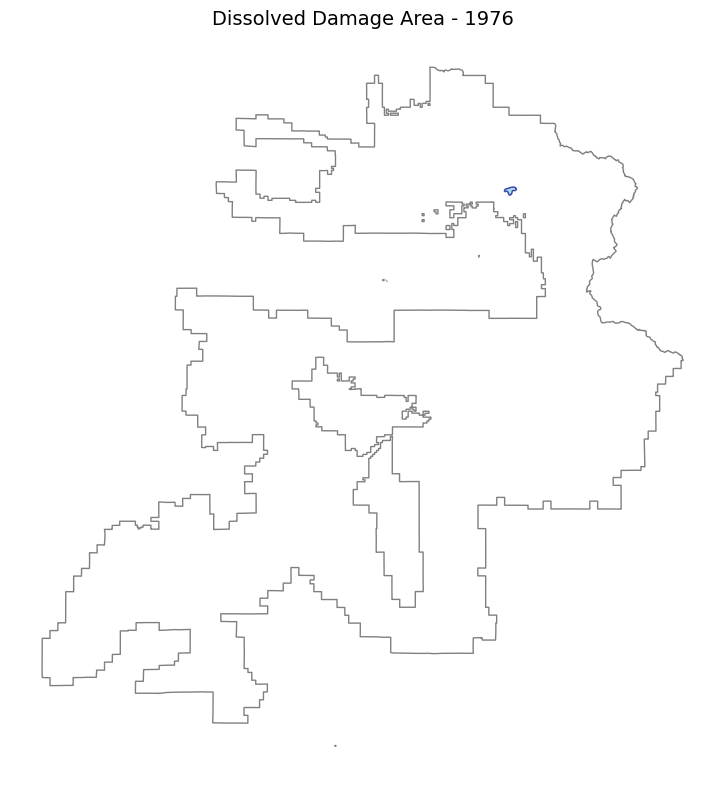

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1976_dissolved.geojson


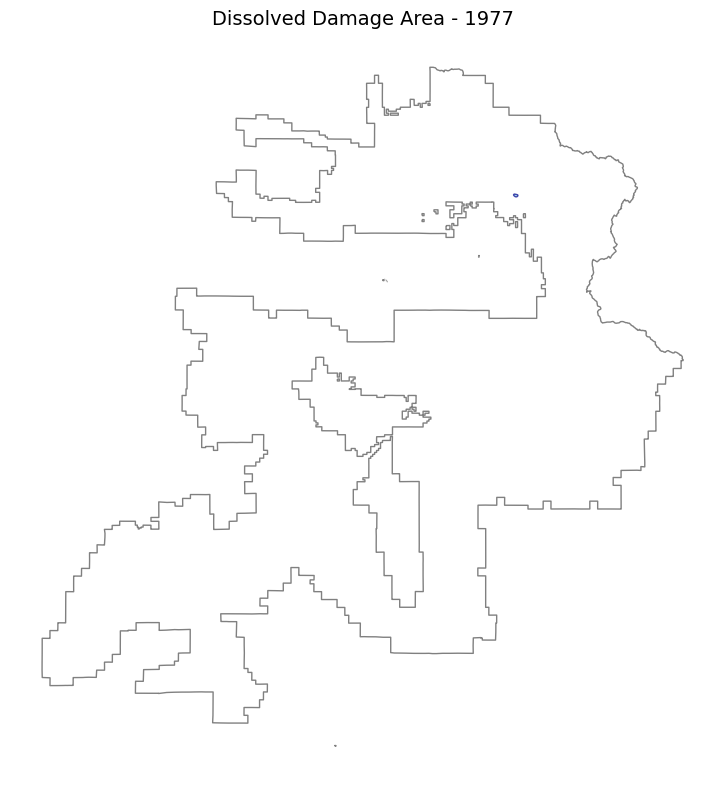

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1977_dissolved.geojson


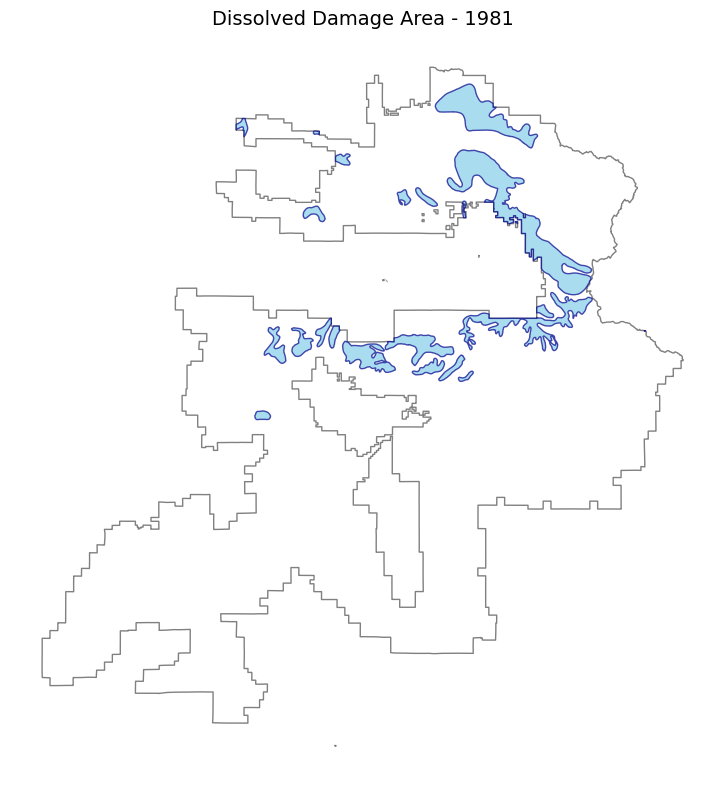

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1981_dissolved.geojson


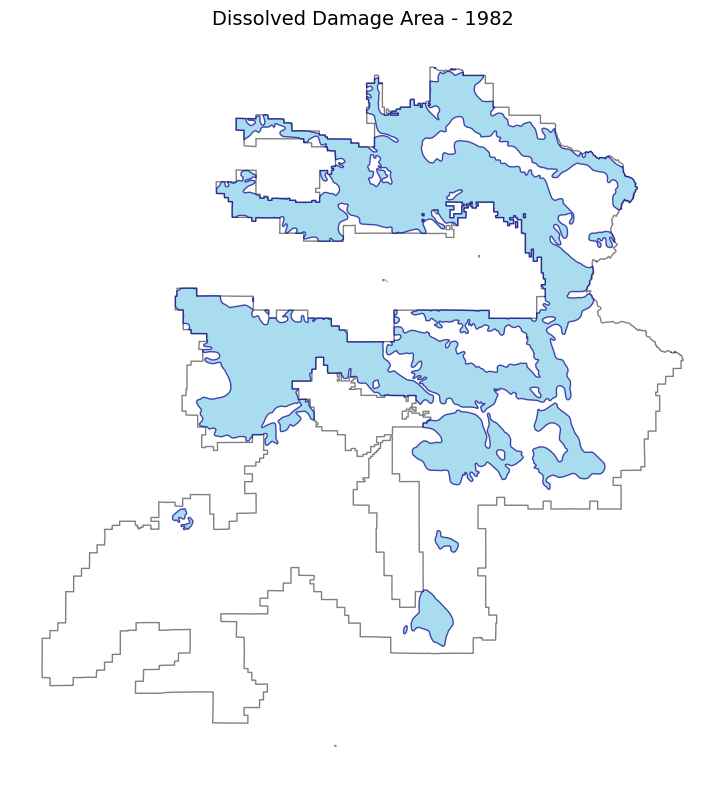

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1982_dissolved.geojson


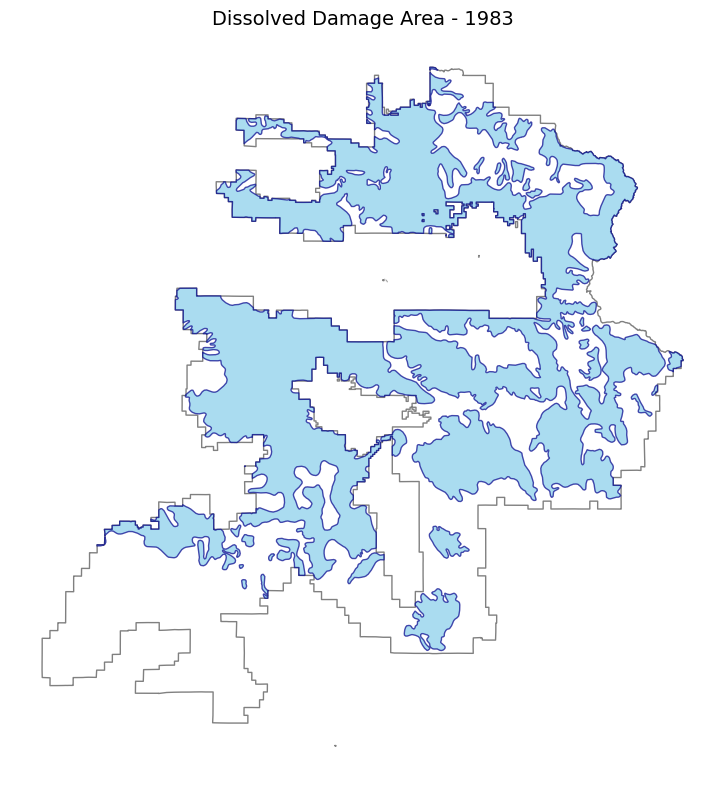

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1983_dissolved.geojson


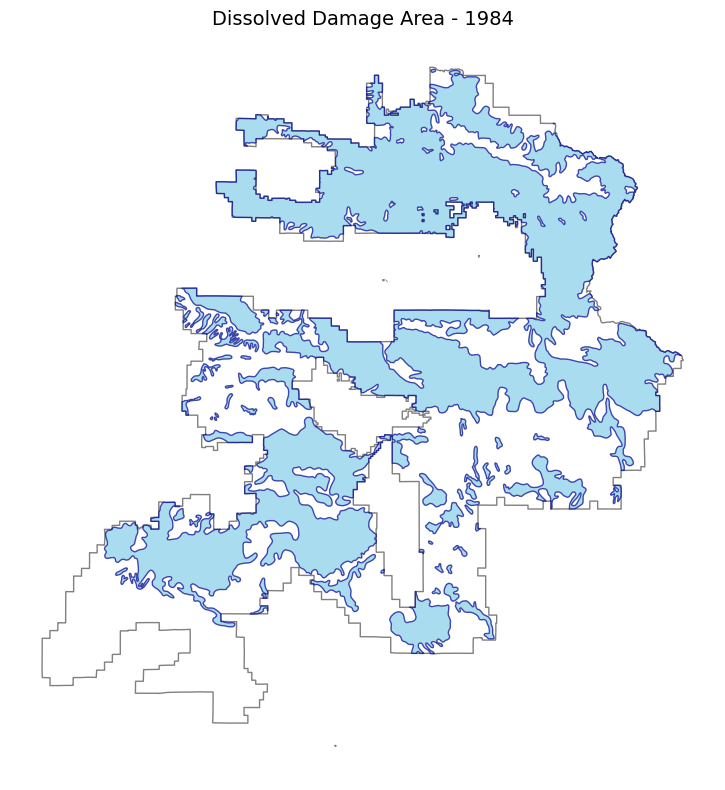

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1984_dissolved.geojson


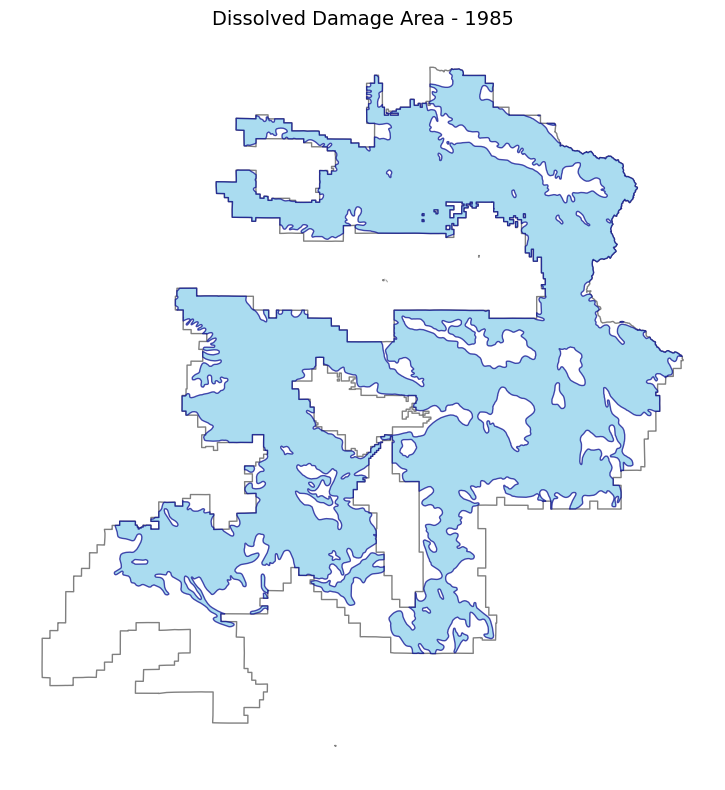

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1985_dissolved.geojson


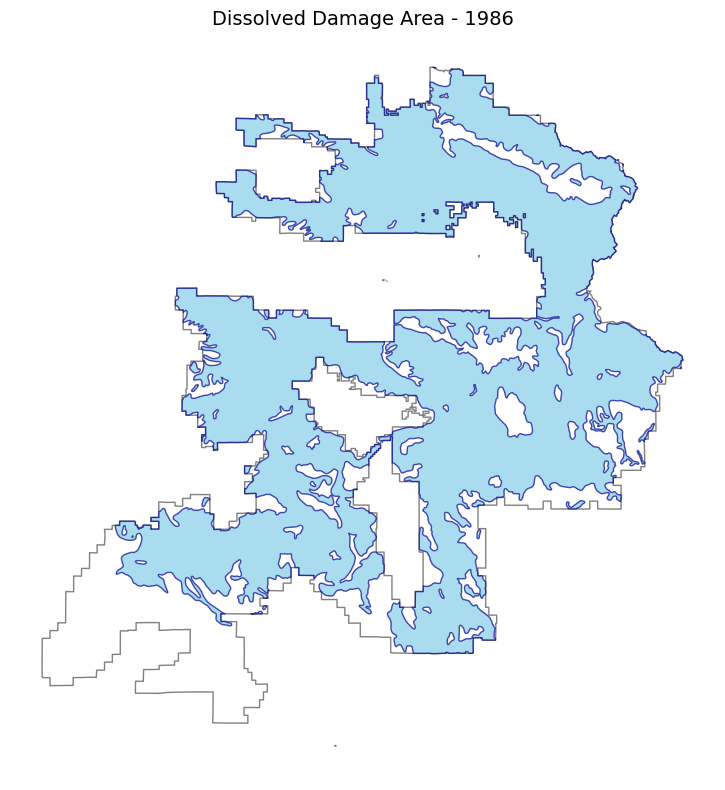

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1986_dissolved.geojson


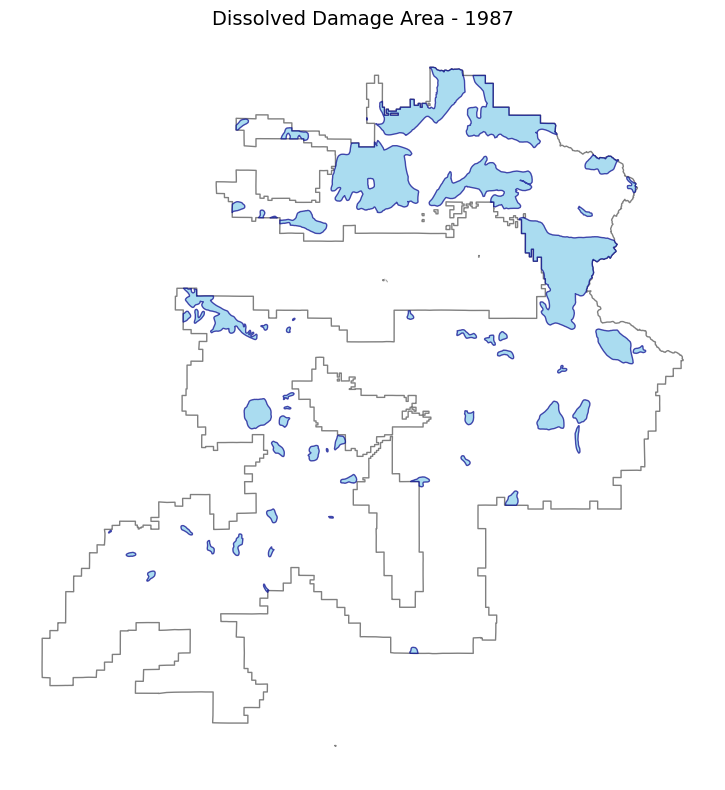

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1987_dissolved.geojson


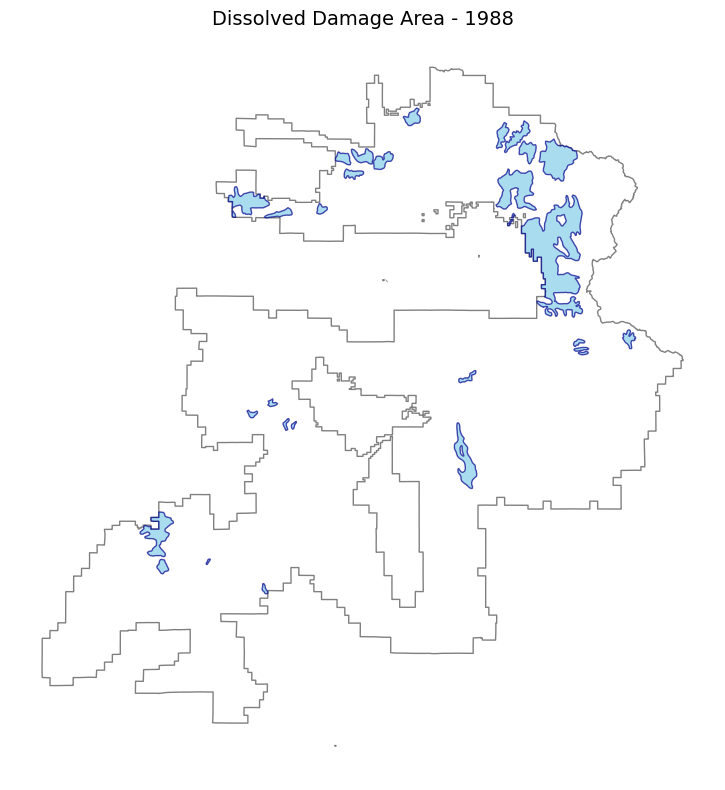

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1988_dissolved.geojson


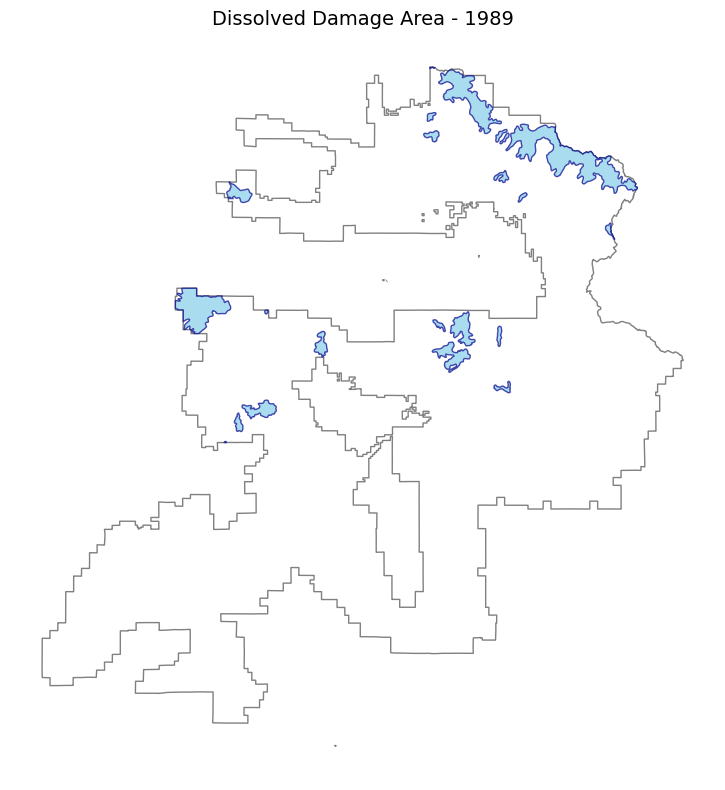

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1989_dissolved.geojson


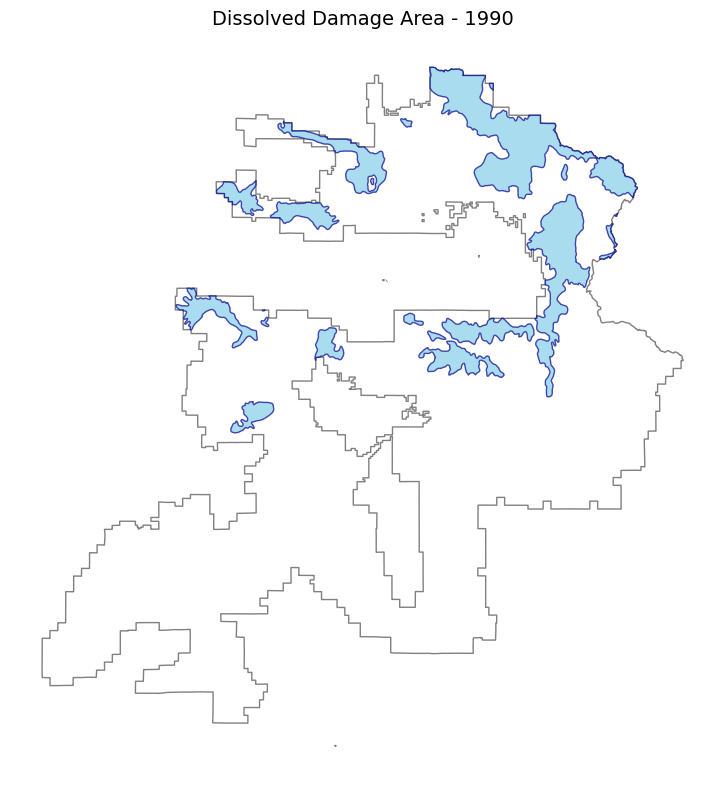

Exported: C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons\damage_1990_dissolved.geojson


In [19]:
# Output folder
## update path
output_folder = r"C:\Users\imire\OneDrive - UW\Documents\GDA567\disturbance_interaction_analysis\extracted_mnf_subset\exported_ads_geojsons\dissolved_yearly_geojsons"
os.makedirs(output_folder, exist_ok=True)

# Reproject MNF bounds if necessary to match CRS
if mnf_bounds.crs != mnf_damage_areas.crs:
    mnf_bounds = mnf_bounds.to_crs(mnf_damage_areas.crs)

# Loop through each unique year
for year in sorted(mnf_damage_areas["SURVEY_YEAR"].dropna().unique()):
    try:
        yearly_data = mnf_damage_areas[mnf_damage_areas["SURVEY_YEAR"] == year]

        if yearly_data.empty:
            print(f"No data for year {year}, skipping.")
            continue

        # Dissolve geometries
        dissolved = yearly_data.dissolve(by="SURVEY_YEAR").reset_index()

        # Plot with MNF boundary in background
        fig, ax = plt.subplots(figsize=(8, 8))
        mnf_bounds.plot(ax=ax, facecolor='none', edgecolor='gray', linewidth=1)
        dissolved.plot(ax=ax, facecolor='skyblue', edgecolor='darkblue', alpha=0.7)

        ax.set_title(f"Dissolved Damage Area - {int(year)}", fontsize=14)
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

        # Export to GeoJSON
        output_path = os.path.join(output_folder, f"damage_{int(year)}_dissolved.geojson")
        dissolved.to_file(output_path, driver="GeoJSON")
        print(f"Exported: {output_path}")

    except Exception as e:
        print(f"Error processing year {year}: {e}")


In [20]:
import ipywidgets as widgets
from IPython.display import display

# Prepare years
years = sorted(mnf_damage_areas["SURVEY_YEAR"].dropna().unique())

def plot_year(year):
    yearly_data = mnf_damage_areas[mnf_damage_areas["SURVEY_YEAR"] == year]
    if yearly_data.empty:
        print(f"No data for {year}")
        return
    dissolved = yearly_data.dissolve(by="SURVEY_YEAR").reset_index()
    fig, ax = plt.subplots(figsize=(8, 8))
    mnf_bounds.plot(ax=ax, facecolor='none', edgecolor='gray')
    dissolved.plot(ax=ax, facecolor='skyblue', edgecolor='darkblue', alpha=0.7)
    ax.set_title(f"Dissolved Damage Area - {int(year)}", fontsize=14)
    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

slider = widgets.IntSlider(min=int(min(years)), max=int(max(years)), step=1, description='Year')
widgets.interact(plot_year, year=slider)


interactive(children=(IntSlider(value=1976, description='Year', max=1990, min=1976), Output()), _dom_classes=(…

<function __main__.plot_year(year)>

In [26]:


# Reproject to Web Mercator
mnf_bounds_web = mnf_bounds.to_crs(epsg=3857)
mnf_damage_areas_web = mnf_damage_areas.to_crs(epsg=3857)

# Prepare available years
years = sorted(mnf_damage_areas_web["SURVEY_YEAR"].dropna().unique())

# Create the year slider
year_slider = widgets.IntSlider(
    value=int(min(years)),
    min=int(min(years)),
    max=int(max(years)),
    step=1,
    description='Year:',
    continuous_update=False
)

# Output area
output = widgets.Output()

# Define the plotting function
def plot_year(change):
    year = change['new']
    output.clear_output(wait=True)
    with output:
        yearly_data = mnf_damage_areas_web[mnf_damage_areas_web["SURVEY_YEAR"] == year]
        if yearly_data.empty:
            print(f"No data for {year}")
            return
        dissolved = yearly_data.dissolve(by="SURVEY_YEAR").reset_index()
        fig, ax = plt.subplots(figsize=(10, 10))
        dissolved.plot(ax=ax, facecolor='skyblue', edgecolor='darkblue', alpha=0.6)
        mnf_bounds_web.boundary.plot(ax=ax, edgecolor='white', linewidth=2)
        ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)
        ax.set_title(f"Dissolved Damage Area - {int(year)}", fontsize=16)
        ax.set_axis_off()
        plt.tight_layout()
        plt.show()

# Link the slider to the plotting function
year_slider.observe(plot_year, names='value')

# Display the widget and output
display(widgets.VBox([year_slider, output]))

# Trigger initial display
plot_year({'new': year_slider.value})